In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [5]:
df = pd.read_csv('speed_dating_data.csv')

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#check for number of participants
df['iid'].nunique( )

551

In [96]:
#check for each gender number of participants
display(df[df['gender'] == 0]['iid'].nunique( ))
df[df['gender'] ==1]['iid'].nunique( )

274

277

### GENDER DISTRIBUTION

Text(0.5, 1.0, 'Male Age Distribution')

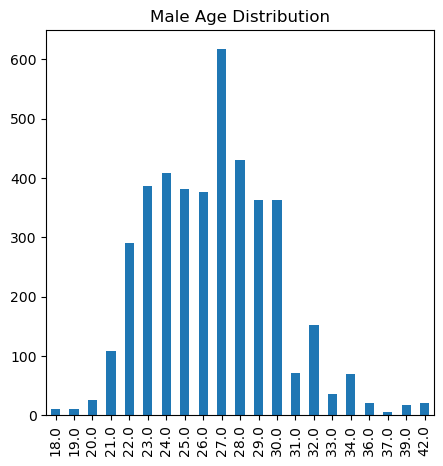

In [125]:
#find the distribution of age and gender with a 2 sided bar plot
male_count = df[(df['gender'] == 1) & (df['age'])]['age'].value_counts()

#sort male count by age and plot
male_count = male_count.sort_index()

male_count.plot(kind = 'bar', figsize = (5, 5))

plt.title('Male Age Distribution')



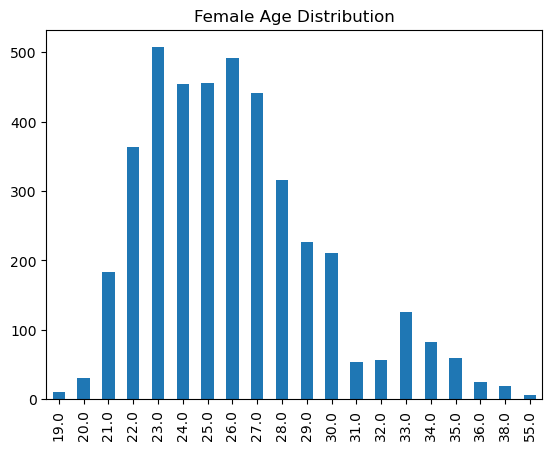

In [124]:
female_count = df[(df['gender'] == 0) & (df['age'])]['age'].value_counts()
female_count = female_count.sort_index()

female_count.plot(kind ='bar')

plt.title("Female Age Distribution")
plt.show()

### STUDY FIELD ANALYSIS 

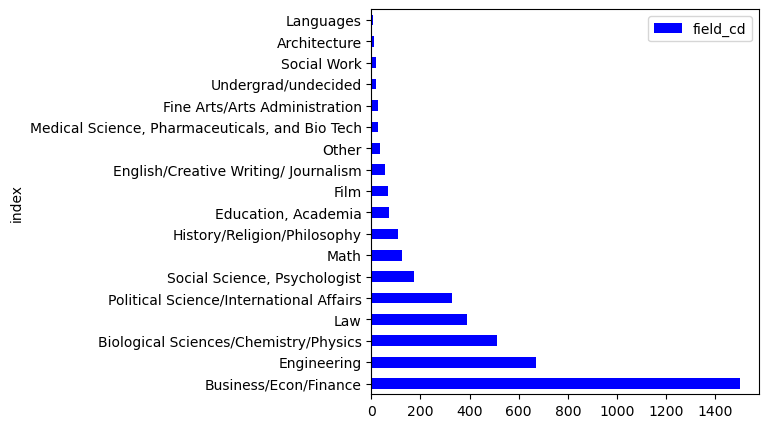

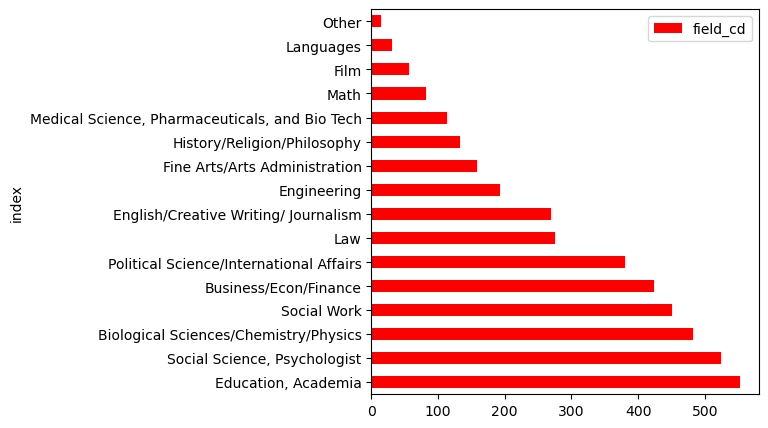

In [57]:
#find the distribution of field of study with a 2 sided bar plot

fos1 = df[df['gender'] == 1]['field_cd'].value_counts().reset_index()
fos0 = df[df['gender'] == 0]['field_cd'].value_counts().reset_index()

#rename all the values in the index column to their respective field of study
fos1['index'] = fos1['index'].replace({1: 'Law', 2: 'Math', 3: 'Social Science, Psychologist', 4: 'Medical Science, Pharmaceuticals, and Bio Tech', 5: 'Engineering', 6: 'English/Creative Writing/ Journalism', 7: 'History/Religion/Philosophy', 8: 'Business/Econ/Finance', 9: 'Education, Academia', 10: 'Biological Sciences/Chemistry/Physics', 11: 'Social Work', 12: 'Undergrad/undecided', 13: 'Political Science/International Affairs', 14: 'Film', 15: 'Fine Arts/Arts Administration', 16: 'Languages', 17: 'Architecture', 18: 'Other'})
fos0['index'] = fos0['index'].replace({1: 'Law', 2: 'Math', 3: 'Social Science, Psychologist', 4: 'Medical Science, Pharmaceuticals, and Bio Tech', 5: 'Engineering', 6: 'English/Creative Writing/ Journalism', 7: 'History/Religion/Philosophy', 8: 'Business/Econ/Finance', 9: 'Education, Academia', 10: 'Biological Sciences/Chemistry/Physics', 11: 'Social Work', 12: 'Undergrad/undecided', 13: 'Political Science/International Affairs', 14: 'Film', 15: 'Fine Arts/Arts Administration', 16: 'Languages', 17: 'Architecture', 18: 'Other'})

#plot the field of study on a stacked horizontal bar plot
fos1.plot(kind = 'barh', x = 'index', y = 'field_cd', color = 'blue', figsize = (5, 5))
fos0.plot(kind = 'barh', x = 'index', y = 'field_cd', color = 'red', figsize = (5, 5))

plt.show()

### STUDY FIELD DIVIDED FOR EACH RACE

In [62]:

df_fod = df.groupby(['race', 'field_cd'], as_index=False).agg({'field': 'count'})
df_fod = df_fod.sort_values(by='race', ascending=True)

#split dfinto 6 new dfs for each race 
df_fod_1 = df_fod[df_fod['race']==1] 
df_fod_2 = df_fod[df_fod['race']==2] 
df_fod_3 = df_fod[df_fod['race']==3] 
df_fod_4 = df_fod[df_fod['race']==4]
df_fod_5 = df_fod[df_fod['race']==5] 
df_fod_6 = df_fod[df_fod['race']==6] 

#find the top 3 fields by count 
df_fod_1 = df_fod_1.sort_values(by='field', ascending=False).head(3)
df_fod_2 = df_fod_2.sort_values(by='field', ascending=False).head(3)
df_fod_3 = df_fod_3.sort_values(by='field', ascending=False).head(3)
df_fod_4 = df_fod_4.sort_values(by='field', ascending=False).head(3)
df_fod_5 = df_fod_5.sort_values(by='field', ascending=False).head(3)
df_fod_6 = df_fod_6.sort_values(by='field', ascending=False).head(3)

#re merge all the dfs 
df_fod = pd.concat([df_fod_1, df_fod_2, df_fod_3, df_fod_4, df_fod_5, df_fod_6])

#change field codes to their respective fields in string format 

df_fod['field_cd'] = df_fod['field_cd'].map({
    1: 'Law',
    2: 'Math',
    3: 'Social Science, Psychologist',
    4: 'Medical Science, Pharmaceuticals, and Bio Tech',
    5: 'Engineering',
    6: 'English/Creative Writing/ Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education, Academia',
    10: 'Biological Sciences/Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Science/International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
})

#change race numbers to their respective actual names
#df_fod['race'] = df_fod['race'].rename({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American', 4: 'Asian', 5: 'Other'})
#df_fod = df_fod.groupby(['race', 'field_cd']).agg({'field': 'sum'}) 

#separate again into each race
df_fod_1 = df_fod[df_fod['race']==1] 
df_fod_2 = df_fod[df_fod['race']==2] 
df_fod_3 = df_fod[df_fod['race']==3] 
df_fod_4 = df_fod[df_fod['race']==4]
df_fod_6 = df_fod[df_fod['race']==6] 

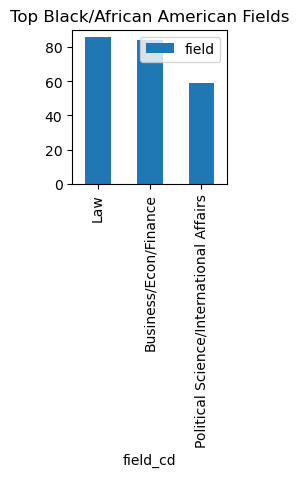

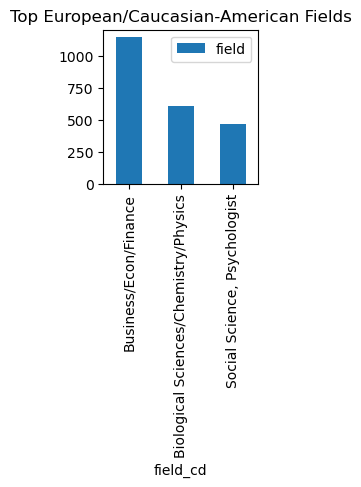

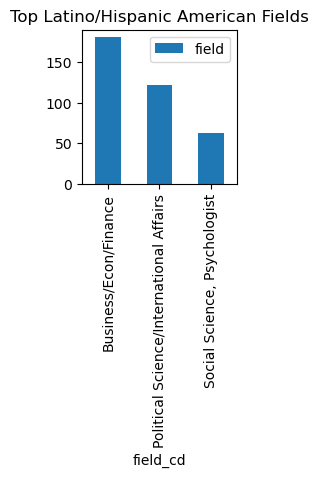

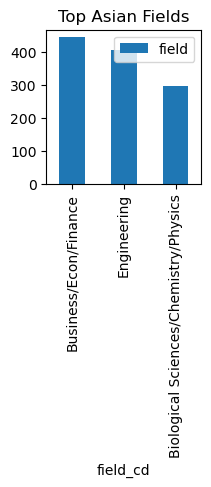

In [61]:
#plot each df_fod but with the field_cd as the x axis and the field as the y axis
df_fod_1.plot(kind='bar', x='field_cd', y='field', figsize=(2,2), title='Top Black/African American Fields')
df_fod_2.plot(kind='bar', x='field_cd', y='field', figsize=(2,2), title='Top European/Caucasian-American Fields')
df_fod_3.plot(kind='bar', x='field_cd', y='field', figsize=(2,2), title='Top Latino/Hispanic American Fields')
df_fod_4.plot(kind='bar', x='field_cd', y='field', figsize=(2,2), title='Top Asian Fields')
#df_fod_6.plot(kind='bar', x='field_cd', y='field', figsize=(2,2), title='Top Other Fields')

plt.show()

### RACE DISTRIBUTION VISUALIZATIONS

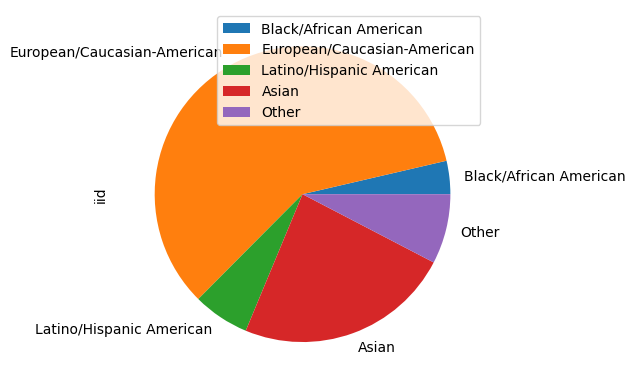

In [118]:
#race count

#separate by male and female using 1 and 0
race_count1 = df[df['gender'] == 1].groupby(['race'])['iid'].unique().apply(len).reset_index()
race_count0 = df[df['gender'] == 0].groupby(['race'])['iid'].unique().apply(len).reset_index()

#change the races to their actual names

race_count1 = race_count1.replace({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American', 4: 'Asian', 6: 'Other'})
race_count0 = race_count0.replace({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American', 4: 'Asian', 6: 'Other'})

#set index as race
race_count1.set_index('race', inplace =True)
race_count0.set_index('race', inplace =True)

#plot race_count1 in a pie chart
race_count1.plot(kind='pie', y = 'iid')

plt.show()

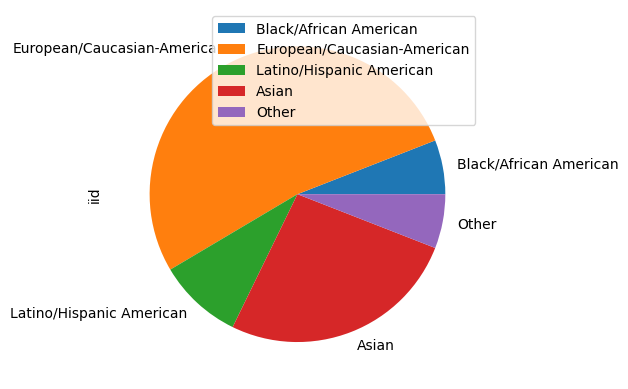

In [117]:
#Female pie chart
race_count0.plot(kind = 'pie', y ='iid')

plt.show()

### SUCCESS RATES FOR EACH GENDER (NOT USED AS MAIN POINT)

In [120]:
#success rates for each gender and race

race_gender = df.groupby(['race', 'gender']).agg({'match': 'sum'})

race_gender['total'] = df.groupby(['race', 'gender']).agg({'match': 'count'})

race_gender['success_rate'] = round(race_gender['match']/race_gender['total'],2)*100

#name every race 
race_gender

match  total  success_rate
race gender                            
1.0  0          52    241          22.0
     1          33    179          18.0
2.0  0         339   2207          15.0
     1         449   2520          18.0
3.0  0          78    403          19.0
     1          45    261          17.0
4.0  0         160   1045          15.0
     1         107    937          11.0
6.0  0          52    245          21.0
     1          51    277          18.0

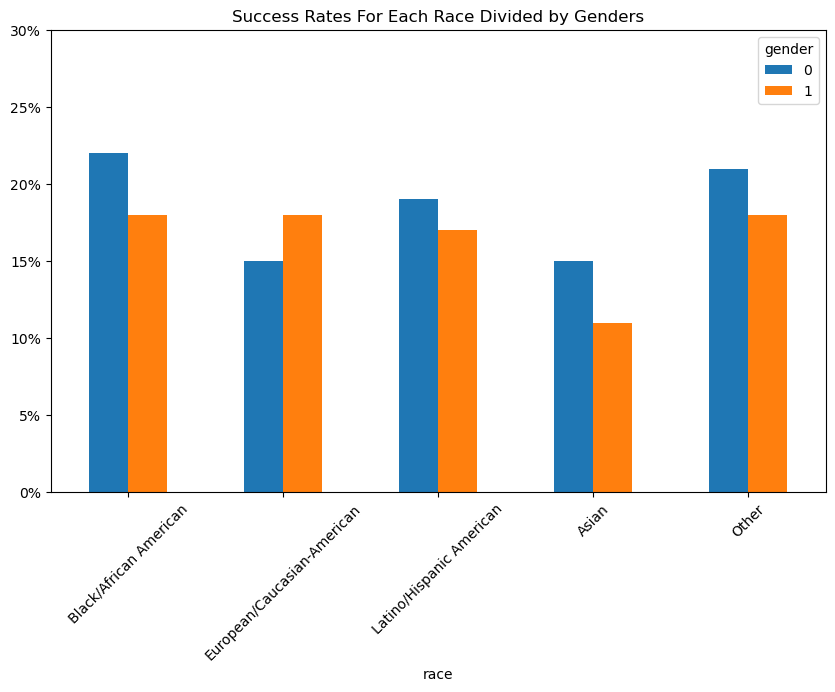

In [93]:
#create a pivot table with the index as columns and the columns as the index
#and values for each as the success rate so that i can plot grouped data
pivot_table = race_gender.pivot_table(index='race', columns='gender', values='success_rate')

#create pivot table
pivot_table.plot(kind='bar', figsize=(10,6))

#rotate the x labels to make them more readable
plt.xticks(rotation=45)
#set the ylimit to 30 
plt.ylim(0,30)
#create percentage labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x))))
#change xlabels to their respective races 
plt.xticks([0,1,2,3,4], ['Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian', 'Other'])
#set the title as Success rates divided through race
plt.title('Success Rates For Each Race Divided by Genders')

plt.show()

In [80]:
race_count0

,race,iid
0,Black/African American,16
1,European/Caucasian-American,142
2,Latino/Hispanic American,25
3,Asian,71
4,Other,16


### INTER-RACIAL AND INTRA-RACIAL SUCCESS RATES

In [9]:
#groupby samerace, we find that we get more matches for inter racial speed dates 
matched_same_race = df.groupby('samerace').agg({'match': ['sum', 'count']})

matched_same_race['match', 'success_rate'] = round(matched_same_race['match', 'sum']/matched_same_race['match', 'count'], 2) *100
matched_same_race


match                   
           sum count success_rate
samerace                         
0          814  5062         16.0
1          566  3316         17.0

In [10]:


# same race matches for both male and female
same_race = df[(df['samerace'] == 1)][['gender', 'race', 'race_o', 'match']]

#highest 
same_race_grouped = same_race.groupby(['race', 'gender']).agg({'match': ['sum', 'count']})

same_race_grouped['match', 'success_rate'] = same_race_grouped['match', 'sum']/same_race_grouped['match', 'count']
df[(df['samerace'] == 0) & (df['match'] == 1) & (df['dec_o'] == 1)][['gender', 'race', 'race_o']]
same_race_grouped


match                   
              sum count success_rate
race gender                         
1.0  0          5     9     0.555556
     1          5     9     0.555556
2.0  0        239  1362     0.175477
     1        239  1362     0.175477
3.0  0          6    26     0.230769
     1          6    26     0.230769
4.0  0         31   240     0.129167
     1         31   240     0.129167
6.0  0          2    21     0.095238
     1          2    21     0.095238

### PREFERENCES SECTION 

In [135]:
import plotly.express as px

#what a man/woman looks for in the other gender
attr = df[df['gender'] == 0][['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].sum().reset_index()
attr1 = df[df['gender'] == 1][['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].sum().reset_index()

#rename attributes to their actual names

attr = attr.rename({0: 'Attractive', 1: 'Sincere', 2: 'Intelligent', 3: 'Fun', 4: 'Ambitious', 5: 'Shared Interests'})
attr1 = attr1.rename({0: 'Attractive', 1: 'Sincere', 2: 'Intelligent', 3: 'Fun', 4: 'Ambitious', 5: 'Shared Interests'})

fig = px.line_polar(attr, r=0, theta=attr.index, line_close=True)
fig2 = px.line_polar(attr1, r=0, theta=attr1.index, line_close=True)

fig.show()
fig2.show()

/Users/hugo/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/hugo/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### turn files into json

In [136]:
#turn attr into a .json
attr.to_json('attr.json')

#turn attr1 into a .json
attr1.to_json('attr1.json')

#turn pivot table into a .json
pivot_table.to_json('race_success_rates.json')

In [137]:
#turn race_count0 into a .json
race_count0.to_json('race_count0.json')
race_count1.to_json('race_count1.json')


#turn male count into json
male_count.to_json('male_count.json')
female_count.to_json('female_count.json')

#turn fos into json  (field of study)
fos0.to_json('fos0.json')
fos1.to_json('fos1.json')


In [ ]:
#turn df_fod into json
df_fod_1.to_json('df_fod_1.json')
df_fod_2.to_json('df_fod_0.json')
df_fod_3.to_json('df_fod_3.json')
df_fod_4.to_json('df_fod_4.json')
df_fod_6.to_json('df_fod_6.json')


### MISC STUDIES

Ignore cells below these were just for misc calculations or ideas that were not used

In [ ]:
#count the number of participants by seeing iid unique 

df['iid'].nunique()

551

In [ ]:
df[df['condtn'] == 1]['condtn'].count()

1434

In [ ]:
display(df[(df['condtn'] == 1) & (df['match']==1)]['match'].count()/df[df['condtn'] == 1]['condtn'].count())

df[(df['condtn'] == 2) & (df['match'] == 1)]['match'].sum()/df[df['condtn'] == 2]['condtn'].count()

0.20223152022315202

0.15697004608294932

In [111]:
attr

attr1_1     74477.80
sinc1_1     75508.16
intel1_1    86635.32
fun1_1      70732.58
amb1_1      52912.29
shar1_1     52125.31
dtype: float64

In [115]:
df['attr']

0       6.0
1       7.0
2       5.0
3       7.0
4       5.0
       ... 
8373    3.0
8374    4.0
8375    4.0
8376    4.0
8377    3.0
Name: attr, Length: 8378, dtype: float64